# Analyzing social - asocial difference

## Expected payoffs

In this experiment we analyze whether systematic variations in $\pi_{high}$ and $\pi_{low}$ lead to correlated changes in social learning frequency; more specifically we use the outcome variable $s - a$ where $s$ is the social learning frequency and $a$ is the asocial learning frequency. We only measured $s$ and calcualte $s - a = s - (1 - s) = 2s - 1$. Based on the general rule "copy when uncertain" we would expect agents seek social information more often when payoffs are closer in value compared to when they are more different. We also use data from this experiment to test whether $s - a$ increases with this form of uncertainty, so that we show our model agrees with existing theoretical predictions and empirical data.

In [1]:
using DrWatson
quickactivate("..")
using Pkg
using Revise
Pkg.instantiate()

includet("../scripts/analysis.jl");

  Activating project at `~/workspace/UncertaintyModel`
┌ Warning: The active manifest file is an older format with no julia version entry. Dependencies may have been resolved with a different julia version.
└ @ nothing /Users/mt/workspace/UncertaintyModel/Manifest.toml:0
  Activating project at `~/workspace/UncertaintyModel`
┌ Info: Precompiling Gadfly [c91e804a-d5a3-530f-b6f0-dfbca275c004]
└ @ Base loading.jl:1423
  Activating project at `~/workspace/UncertaintyModel`
┌ Info: Precompiling Debugger [31a5f54b-26ea-5ae9-a837-f05ce5417438]
└ @ Base loading.jl:1423


In [2]:
datafile = "../data/Archive-CogSci2022/cogsci2022/expected-payoff_env_uncertainty=[0.1]_high_payoff=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]_low_payoff=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]_nbehaviors=[100]_niter=100000_ntrials=100_steps_per_round=[20]_vertical=true.jld2"
result = load(datafile)["result"]

figuresdir = "/Users/mt/workspace/Writing/CogSci2022/Figures"

expayoff_soclearnfreq = 
    payoffs_heatmap(result; colormin=-.3, colormax=.3, title="u = 0.1")

draw(PDF("$figuresdir/expected-payoff-heatmap_envUnc0p1.pdf", 10cm, 8cm), expayoff_soclearnfreq)

In [3]:
datafile = "../data/Archive-CogSci2022/cogsci2022/expected-payoff_env_uncertainty=[0.9]_high_payoff=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]_low_payoff=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]_nbehaviors=[100]_niter=100000_ntrials=100_steps_per_round=[20]_vertical=true.jld2"
result = load(datafile)["result"]

expayoff_soclearnfreq = 
    payoffs_heatmap(result; colormin=-.3, colormax=.3, title="u = 0.9")

draw(PDF("$figuresdir/expected-payoff-heatmap_envUnc0p9.pdf", 10cm, 8cm), 
     expayoff_soclearnfreq)

In [4]:
data_dir = "../data/Archive-CogSci2022/cogsci2022/"
uncdf = make_uncertainty_df(data_dir, "expected-payoff");

  Activating project at `~/workspace/UncertaintyModel`
  Activating project at `~/workspace/UncertaintyModel`


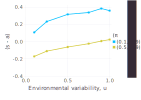

In [5]:
include("../scripts/analysis.jl")
uncdf_fil = filter(r -> (r.high_payoff in [0.9]) && (r.low_payoff in [0.1, 0.5]), uncdf);
p = plot_final(uncdf_fil, 
    xticks = [0.0,  0.5,  1.0], yticks = -0.4:0.2:0.4, 
    xvar = :env_uncertainty, yvar = :soclearnfreq, linestylevar = nothing,
    title = "", xlabel = "Environmental variability, u",
    legendtitle = "(π<sub>low</sub>, π<sub>high</sub>)")

# draw(PDF("$figuresdir/s-a_overEnvUnc.pdf", 11cm, 5.5cm), p)

  Activating project at `~/workspace/UncertaintyModel`
  Activating project at `~/workspace/UncertaintyModel`


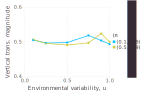

In [6]:
include("../scripts/analysis.jl")
uncdf_fil = filter(r -> (r.high_payoff in [0.9]) && (r.low_payoff in [0.1, 0.5]), uncdf);
p = plot_final(uncdf_fil, 
    xticks = [0.0,  0.5,  1.0], yticks = 0.4:0.1:0.6, 
    xvar = :env_uncertainty, yvar = :vertical_transmag, linestylevar = nothing,
    title = "", xlabel = "Environmental variability, u",
    legendtitle = "(π<sub>low</sub>, π<sub>high</sub>)")

# draw(PDF("$figuresdir/s-a_overEnvUnc.pdf", 11cm, 5.5cm), p)

## Steps per round

In [7]:
include("../scripts/analysis.jl")

datafile0p1 = "../data/Archive-CogSci2022/cogsci2022/steps_per_round_env_uncertainty=[0.1]_high_payoff=[0.2,0.9]_low_payoff=[0.1,0.8]_nbehaviors=[5,20,100]_niter=100000_ntrials=100_steps_per_round=[5,10,20,50,100]_vertical=true.jld2"
datafile0p9 = "../data/Archive-CogSci2022/cogsci2022/steps_per_round_env_uncertainty=[0.9]_high_payoff=[0.2,0.9]_low_payoff=[0.1,0.8]_nbehaviors=[5,20,100]_niter=100000_ntrials=100_steps_per_round=[5,10,20,50,100]_vertical=true.jld2"

result0p1 = load(datafile0p1)["result"]
result0p9 = load(datafile0p9)["result"]

result0p1[!, :env_uncertainty] .= 0.1
result0p9[!, :env_uncertainty] .= 0.9

result = vcat(result0p1, result0p9)

first(result)

# Limit analysis to B = 100 case.
nbeh = 100
sub = subset(result, :nbehaviors => x -> x.== nbeh)

p = plot_final(sub; xvar = :steps_per_round, yvar = :soclearnfreq, linestylevar = :env_uncertainty,
    yticks=-0.1:0.1:0.4, xticks = [5,20,50,100], xlabel = "Steps per round, M",
    legendtitle = "(π<sub> low</sub>, π<sub> high</sub>)", title = "")

draw(PDF("$figuresdir/steps_per_round.pdf", 12cm, 8cm), p)

  Activating project at `~/workspace/UncertaintyModel`
  Activating project at `~/workspace/UncertaintyModel`


## Number of behaviors

In [8]:
include("../scripts/analysis.jl")

datafile0p1 = "../data/Archive-CogSci2022/cogsci2022/nbehaviors_env_uncertainty=[0.1]_high_payoff=[0.2,0.9]_low_payoff=[0.1,0.8]_nbehaviors=[10,20,30,40,50,60,70,80,90,100]_niter=100000_ntrials=100_steps_per_round=[20]_vertical=true.jld2"
datafile0p9 = "../data/Archive-CogSci2022/cogsci2022/nbehaviors_env_uncertainty=[0.9]_high_payoff=[0.2,0.9]_low_payoff=[0.1,0.8]_nbehaviors=[10,20,30,40,50,60,70,80,90,100]_niter=100000_ntrials=100_steps_per_round=[20]_vertical=true.jld2"

result0p1 = load(datafile0p1)["result"]
result0p9 = load(datafile0p9)["result"]

result0p1[!, :env_uncertainty] .= 0.1
result0p9[!, :env_uncertainty] .= 0.9

result = vcat(result0p1, result0p9)

first(result)


p = plot_final(result; xvar = :nbehaviors, yvar = :soclearnfreq, linestylevar = :env_uncertainty,
    yticks=-0.10:0.1:0.5, xticks = 10:30:100, 
     xlabel = "# Possible behaviors, B",
    legendtitle = "(π<sub> low</sub>, π<sub> high</sub>)", title = "")

draw(PDF("$figuresdir/nbehaviors.pdf", 12cm, 8cm), p)

  Activating project at `~/workspace/UncertaintyModel`
  Activating project at `~/workspace/UncertaintyModel`


# Analyzing strength of vertical transmission, $v$

Here we inspect the evolutionary course of vertical transmission.

## Expected payoffs manipulation

### $u = 0.1$

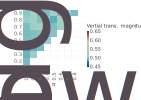

In [9]:
datafile = "../data/Archive-CogSci2022/cogsci2022/expected-payoff_env_uncertainty=[0.1]_high_payoff=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]_low_payoff=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]_nbehaviors=[100]_niter=100000_ntrials=100_steps_per_round=[20]_vertical=true.jld2"
result = load(datafile)["result"]

expayoff_soclearnfreq =
    payoffs_heatmap(result; zvar = :vertical_transmag)

### $u = 0.9$

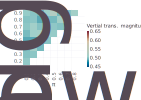

In [10]:
datafile = "../data/Archive-CogSci2022/cogsci2022/expected-payoff_env_uncertainty=[0.9]_high_payoff=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]_low_payoff=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]_nbehaviors=[100]_niter=100000_ntrials=100_steps_per_round=[20]_vertical=true.jld2"
result = load(datafile)["result"]

expayoff_soclearnfreq =
    payoffs_heatmap(result; zvar = :vertical_transmag)

## Steps per round

  Activating project at `~/workspace/UncertaintyModel`
  Activating project at `~/workspace/UncertaintyModel`


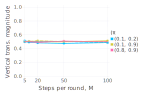

In [11]:
include("../scripts/analysis.jl")

datafile0p1 = "../data/Archive-CogSci2022/cogsci2022/steps_per_round_env_uncertainty=[0.1]_high_payoff=[0.2,0.9]_low_payoff=[0.1,0.8]_nbehaviors=[5,20,100]_niter=100000_ntrials=100_steps_per_round=[5,10,20,50,100]_vertical=true.jld2"
datafile0p9 = "../data/Archive-CogSci2022/cogsci2022/steps_per_round_env_uncertainty=[0.9]_high_payoff=[0.2,0.9]_low_payoff=[0.1,0.8]_nbehaviors=[5,20,100]_niter=100000_ntrials=100_steps_per_round=[5,10,20,50,100]_vertical=true.jld2"

result0p1 = load(datafile0p1)["result"]
result0p9 = load(datafile0p9)["result"]

result0p1[!, :env_uncertainty] .= 0.1
result0p9[!, :env_uncertainty] .= 0.9

result = vcat(result0p1, result0p9)

first(result)

# Limit analysis to B = 100 case.
nbeh = 100
sub = subset(result, :nbehaviors => x -> x.== nbeh)

p = plot_final(sub; xvar = :steps_per_round, yvar = :vertical_transmag, linestylevar = :env_uncertainty,
#     yticks=-0.1:0.1:0.4, 
    xticks = [5,20,50,100], xlabel = "Steps per round, M",
    legendtitle = "(π<sub> low</sub>, π<sub> high</sub>)", title = "")

# draw(PDF("$figuresdir/steps_per_round.pdf", 12cm, 8cm), p)


## Number of behaviors

  Activating project at `~/workspace/UncertaintyModel`
  Activating project at `~/workspace/UncertaintyModel`


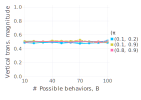

In [12]:
include("../scripts/analysis.jl")

datafile0p1 = "../data/Archive-CogSci2022/cogsci2022/nbehaviors_env_uncertainty=[0.1]_high_payoff=[0.2,0.9]_low_payoff=[0.1,0.8]_nbehaviors=[10,20,30,40,50,60,70,80,90,100]_niter=100000_ntrials=100_steps_per_round=[20]_vertical=true.jld2"
datafile0p9 = "../data/Archive-CogSci2022/cogsci2022/nbehaviors_env_uncertainty=[0.9]_high_payoff=[0.2,0.9]_low_payoff=[0.1,0.8]_nbehaviors=[10,20,30,40,50,60,70,80,90,100]_niter=100000_ntrials=100_steps_per_round=[20]_vertical=true.jld2"

result0p1 = load(datafile0p1)["result"]
result0p9 = load(datafile0p9)["result"]

result0p1[!, :env_uncertainty] .= 0.1
result0p9[!, :env_uncertainty] .= 0.9

result = vcat(result0p1, result0p9)

p = plot_final(result; xvar = :nbehaviors, yvar = :vertical_transmag, linestylevar = :env_uncertainty,
    xticks = 10:30:100, xlabel = "# Possible behaviors, B", 
    legendtitle = "(π<sub> low</sub>, π<sub> high</sub>)", title = "")

# draw(PDF("$figuresdir/nbehaviors.pdf", 12cm, 8cm), p)


# Time series of social learning

As a final check we ensure that average social learning frequency over all agents has stabilized by the 80,000th time step when we start aggregating data for the above results.

## Expected payoffs

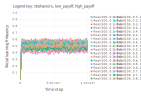

In [13]:
datafile = "../data/Archive-CogSci2022/cogsci2022/expected-payoff_env_uncertainty=[0.1]_high_payoff=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]_low_payoff=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]_nbehaviors=[100]_niter=100000_ntrials=100_steps_per_round=[20]_vertical=true.jld2"
result = load(datafile)["result"]

plot_series(result)

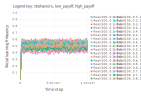

In [14]:
datafile = "../data/Archive-CogSci2022/cogsci2022/expected-payoff_env_uncertainty=[0.1]_high_payoff=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]_low_payoff=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]_nbehaviors=[100]_niter=100000_ntrials=100_steps_per_round=[20]_vertical=true.jld2"
result = load(datafile)["result"]

plot_series(result)

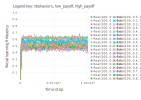

In [15]:
datafile = "../data/Archive-CogSci2022/cogsci2022/expected-payoff_env_uncertainty=[0.25]_high_payoff=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]_low_payoff=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]_nbehaviors=[100]_niter=100000_ntrials=100_steps_per_round=[20]_vertical=true.jld2"
result = load(datafile)["result"]

plot_series(result)

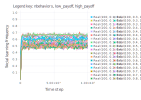

In [16]:
datafile = "../data/Archive-CogSci2022/cogsci2022/expected-payoff_env_uncertainty=[0.75]_high_payoff=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]_low_payoff=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]_nbehaviors=[100]_niter=100000_ntrials=100_steps_per_round=[20]_vertical=true.jld2"
result = load(datafile)["result"]

plot_series(result)

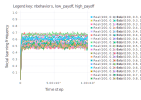

In [17]:
datafile = "../data/Archive-CogSci2022/cogsci2022/expected-payoff_env_uncertainty=[0.9]_high_payoff=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]_low_payoff=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]_nbehaviors=[100]_niter=100000_ntrials=100_steps_per_round=[20]_vertical=true.jld2"
result = load(datafile)["result"]

plot_series(result)

## Number of behaviors

  Activating project at `~/workspace/UncertaintyModel`
  Activating project at `~/workspace/UncertaintyModel`


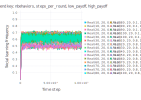

In [18]:
include("../scripts/analysis.jl")

datafile0p1 = "../data/Archive-CogSci2022/cogsci2022/nbehaviors_env_uncertainty=[0.1]_high_payoff=[0.2,0.9]_low_payoff=[0.1,0.8]_nbehaviors=[10,20,30,40,50,60,70,80,90,100]_niter=100000_ntrials=100_steps_per_round=[20]_vertical=true.jld2"
datafile0p9 = "../data/Archive-CogSci2022/cogsci2022/nbehaviors_env_uncertainty=[0.9]_high_payoff=[0.2,0.9]_low_payoff=[0.1,0.8]_nbehaviors=[10,20,30,40,50,60,70,80,90,100]_niter=100000_ntrials=100_steps_per_round=[20]_vertical=true.jld2"

result0p1 = load(datafile0p1)["result"]
result0p9 = load(datafile0p9)["result"]

result0p1[!, :env_uncertainty] .= 0.1
result0p9[!, :env_uncertainty] .= 0.9

result = vcat(result0p1, result0p9)

plot_series(result; legendkeys = [:nbehaviors, :steps_per_round, :low_payoff, :high_payoff])

## Steps per round

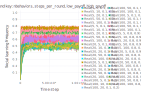

In [19]:
datafile0p1 = "../data/Archive-CogSci2022/cogsci2022/steps_per_round_env_uncertainty=[0.1]_high_payoff=[0.2,0.9]_low_payoff=[0.1,0.8]_nbehaviors=[5,20,100]_niter=100000_ntrials=100_steps_per_round=[5,10,20,50,100]_vertical=true.jld2"
datafile0p9 = "../data/Archive-CogSci2022/cogsci2022/steps_per_round_env_uncertainty=[0.9]_high_payoff=[0.2,0.9]_low_payoff=[0.1,0.8]_nbehaviors=[5,20,100]_niter=100000_ntrials=100_steps_per_round=[5,10,20,50,100]_vertical=true.jld2"

result0p1 = load(datafile0p1)["result"]
result0p9 = load(datafile0p9)["result"]

result0p1[!, :env_uncertainty] .= 0.1
result0p9[!, :env_uncertainty] .= 0.9

result = vcat(result0p1, result0p9)

plot_series(result; legendkeys = [:nbehaviors, :steps_per_round, :low_payoff, :high_payoff])